<a href="https://colab.research.google.com/github/vani9306/EDA_using_Python/blob/master/Investment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Satement:**
###Understanding the global trends in investments for the investment firm, SPARKS FUNDS

###**Business objective:** The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.


---
Let's begin our analysis by importing the required python libraries


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x:'%.4f'%x)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#path from where the files are accessed:
path = '/content/'

In [ ]:
#Importing the companies data

companies = pd.read_csv(path+'companies.txt', sep='\t',encoding='latin1')

print("Rows and Columns present in the companies dataframe:",companies.shape)

Rows and Columns present in the companies dataframe: (66368, 10)


In [ ]:
#Information on the attributes present in the companies dataframe
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [ ]:
#viewing the first 5 rows of data present in the companies dataframe
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [ ]:
#viewing the last 5 rows of data present in the companies dataframe
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Importing the rounds2 data
rounds2 = pd.read_csv(path+'rounds2.csv',encoding='latin1')

print("Rows and Columns present in the rounds2 dataframe:",rounds2.shape)

Rows and Columns present in the rounds2 dataframe: (114949, 6)


In [ ]:
#Information on the attributes present in the rounds2 dataframe
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
#describing the raised_amt

rounds2.describe()

,raised_amount_usd
count,94959.0000
mean,10426869.3345
std,114821247.9849
min,0.0000
25%,322500.0000
50%,1680511.0000
75%,7000000.0000
max,21271935000.0000


In [ ]:
#viewing the first 5 rows of data present in the rounds2 dataframe
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0000


In [ ]:
#viewing the last 5 rows of data present in the rounds2 dataframe
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0000
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0000
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0000
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0000


In [ ]:
#taking a copy of the original data frames
company_df = companies.copy()
rounds2_df = rounds2.copy()

The analysis is divided into 6 checkpoints for covering all the aspects of the goals listed for enabling Sparks Funds to invest in the best posible country and sector within its investment margin

Note: The checkpoint 6 (Plots) will be combined with other checkpoints as seemed fit

##**Checkpoint 1**: Data Understanding and cleaning
---





In [ ]:
#Ensuring the columns to merge the data frames are consistent
#coverting the the primary/unique keys to lower case
companies['permalink'] = companies.permalink.str.lower()
rounds2['company_permalink'] = rounds2.company_permalink.str.lower()

#stripping the whitespaces if present
companies['permalink'] = companies.permalink.str.strip()
rounds2['company_permalink'] = rounds2.company_permalink.str.strip()

#removing the spl characters
companies['permalink'] = companies['permalink'].str.replace(r'[^A-Za-z0-9\-\/]+', "")
companies['name'] = companies['name'].str.replace(r"[^A-za-z0-9\-\/\.' ']+","")
rounds2['company_permalink'] = rounds2['company_permalink'].str.replace(r'[^A-Za-z0-9\-\/]+',"")

In [ ]:
#checking for null values
print("Number of null values present in the column permalink in companies df:",companies.permalink.isnull().sum())
print("Number of null values present in the column company_permalink in rounds2 df:",rounds2.company_permalink.isnull().sum())

#checking if rounds2 df contains any extra permalink present in it
c = companies.permalink.unique()
r = rounds2.company_permalink.unique()
print("\nUnique companies present in the comapnies df:",companies.permalink.nunique())
print("Unique companies present in the rounds2 df:", rounds2.company_permalink.nunique())
print("\nCompanies in the rounds2 file which are not  present in companies:", np.setdiff1d(r,c))

Number of null values present in the column permalink in companies df: 0
Number of null values present in the column company_permalink in rounds2 df: 0

Unique companies present in the comapnies df: 66368
Unique companies present in the rounds2 df: 66368

Companies in the rounds2 file which are not  present in companies: []


In [ ]:
#checking if any rows are duplicated
print("Number of rows duplicated in companies df:",len(companies[companies.duplicated()]))
print("Number of rows duplicated in rounds2 df:",len(rounds2[rounds2.duplicated()]))

Number of rows duplicated in companies df: 0
Number of rows duplicated in rounds2 df: 0


In [ ]:
#renaming the column before the merge
companies = companies.rename(columns={'permalink':'company_permalink'})

master_frame = rounds2.merge(companies,how='inner',on='company_permalink')

#verifying the shape of the merged df
print("Shape of the master_frame:",master_frame.shape)

Shape of the master_frame: (114949, 15)


In [ ]:
print("Number of observations found in master_frame after the merge:",master_frame.shape[0])

Number of observations found in master_frame after the merge: 114949


In [ ]:
#verifying the unique count of company_permalink again
print(master_frame.company_permalink.nunique())

66368


In [ ]:
#viewing a sample of data from the merged df
master_frame.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0000,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0000,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0000,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0000,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


##**Checkpoint 2: Funding Type Analysis**

---
Spark Funds wants to choose one of the four investment types stated below for each potential investment they will make
1.   angel
2.   seed
3.   venture
4.   private equity


In [ ]:
#continuing the data cleaning process...
#collecting the data that focuses on the funding_type Sparks Funds are intersrested in 
investment = master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])

master_frame = master_frame[investment]

#viewing the shape of the filtered dataframe
print("Shape of the filtered dataframe is:", master_frame.shape)
#viewing the samples from the filtered dataframe
master_frame.head()

Shape of the filtered dataframe is: (94397, 15)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0000,Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0000,THE ONE of THEMInc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [ ]:
#checking the various operational status of the companies listed in the dataframe
master_frame.status.value_counts()

operating    73653
acquired     10229
closed        7553
ipo           2962
Name: status, dtype: int64

In [ ]:
#eliminating the companies that are no longer operational
operating = ~master_frame['status'].isin(['closed'])

master_frame = master_frame[operating]

print("Shape of the dataframe after filtering the operational status:", master_frame.shape)
master_frame.head()

Shape of the dataframe after filtering the operational status: (86844, 15)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0000,Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0000,THE ONE of THEMInc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [ ]:
#checking the operational status to verify if the "closed" status is eliminated
master_frame.status.value_counts()

operating    73653
acquired     10229
ipo           2962
Name: status, dtype: int64

In [ ]:
#checking how many rows have all missing values
master_frame.isnull().all(axis=1).sum()

0

In [ ]:
#checking for null items as per the columns
master_frame.isnull().sum()/len(master_frame.index)

company_permalink         0.0000
funding_round_permalink   0.0000
funding_round_type        0.0000
funding_round_code        0.6668
funded_at                 0.0000
raised_amount_usd         0.1421
name                      0.0000
homepage_url              0.0399
category_list             0.0187
status                    0.0000
country_code              0.0660
state_code                0.0869
region                    0.0791
city                      0.0790
founded_at                0.1658
dtype: float64

In [ ]:
#Dropping the columns that do not contribute much to our current analysis, we get:
master_frame = master_frame.drop(columns=['homepage_url','state_code','region','city','founded_at'])

In [ ]:
print("Shape of the dataframe post the coloumn drop:",master_frame.shape)
#checking for the null values
master_frame.isnull().sum()/len(master_frame.index)

Shape of the dataframe post the coloumn drop: (86844, 10)


company_permalink         0.0000
funding_round_permalink   0.0000
funding_round_type        0.0000
funding_round_code        0.6668
funded_at                 0.0000
raised_amount_usd         0.1421
name                      0.0000
category_list             0.0187
status                    0.0000
country_code              0.0660
dtype: float64

In [ ]:
#dealing with the column 'raised_amount_usd'
#describing the raised_amount_usd column
master_frame.raised_amount_usd.describe()

count         74501.0000
mean        9551480.9437
std        78406517.4354
min               0.0000
25%          435000.0000
50%         2000000.0000
75%         8000000.0000
max     17600000000.0000
Name: raised_amount_usd, dtype: float64

In [ ]:
#eliminating the rows that has the investment amount as 0
#retaining all the other values since the country and sectors with the highest investment amount needs be calculated.
master_frame = master_frame[master_frame.raised_amount_usd!=0]

print("Shape of the dataframe after eliminating the 0 investment amount:", master_frame.shape)
master_frame.isnull().sum()/len(master_frame.index)

Shape of the dataframe after eliminating the 0 investment amount: (86691, 10)


company_permalink         0.0000
funding_round_permalink   0.0000
funding_round_type        0.0000
funding_round_code        0.6664
funded_at                 0.0000
raised_amount_usd         0.1424
name                      0.0000
category_list             0.0186
status                    0.0000
country_code              0.0658
dtype: float64

In [ ]:
#The columns raised_amount_usd, category_list and country_code are needed to determine the best sector and country. 
#These columns contain 14%, 2% and 7% of null values respectively, dropping the NaN values we get:

master_frame.dropna(subset=['raised_amount_usd','category_list','country_code'],inplace=True)
print("Shape of the dataframe post dropping the NaN values:", master_frame.shape)

Shape of the dataframe post dropping the NaN values: (70043, 10)


In [ ]:
#checking for null items
master_frame.isnull().sum()/len(master_frame.index)

company_permalink         0.0000
funding_round_permalink   0.0000
funding_round_type        0.0000
funding_round_code        0.6421
funded_at                 0.0000
raised_amount_usd         0.0000
name                      0.0000
category_list             0.0000
status                    0.0000
country_code              0.0000
dtype: float64

The column funding_round_code contains the majority of null values(64%).Since this column is of type 'object', it can be imputed with the most occuring finding_round_code value for each of the funding_round_type

In [ ]:
#checking for the most common occuring funding round code for each funding type
master_frame.groupby(['funding_round_type','funding_round_code'])['raised_amount_usd'].count()

funding_round_type  funding_round_code
angel               A                        16
private_equity      A                         2
                    C                         1
                    H                         1
seed                A                        71
                    B                         8
                    C                         1
venture             A                     11130
                    B                      7191
                    C                      3813
                    D                      1769
                    E                       738
                    F                       247
                    G                        67
                    H                        10
Name: raised_amount_usd, dtype: int64

In [ ]:
#as seen above the most occuring funding_round_code is "A", hence the value 'A' is chosen to replace the NaN values
mode_val = master_frame['funding_round_code'].mode()[0]
master_frame['funding_round_code'] = master_frame['funding_round_code'].fillna(mode_val)

In [ ]:
print("Shape of the dataframe post the data cleaning:",master_frame.shape)

#verifying for any null values left in the master_frame
master_frame.isnull().sum()/len(master_frame.index)

Shape of the dataframe post the data cleaning: (70043, 10)


company_permalink         0.0000
funding_round_permalink   0.0000
funding_round_type        0.0000
funding_round_code        0.0000
funded_at                 0.0000
raised_amount_usd         0.0000
name                      0.0000
category_list             0.0000
status                    0.0000
country_code              0.0000
dtype: float64

In [ ]:
#Loss of data calculation:
print("Loss of data(in percentage) when compared with the original 114949 observations:{:.2%}".format(1-(70162/114949)))
print("Loss of data(in percentage) when compared with the filtered funding type and operational status with 86844 observations:{:.2%}".format(1-(70162/86844)))

Loss of data(in percentage) when compared with the original 114949 observations:38.96%
Loss of data(in percentage) when compared with the filtered funding type and operational status with 86844 observations:19.21%


Now we have the dataframe with no Null values for our further analysis, lets start our checkpoint 2.



---


Finding the best suited funding type for Spark Funds 

In [ ]:
#calculating the fraction of investment for each funding type
frac = master_frame.groupby('funding_round_type')['raised_amount_usd'].sum().to_frame().reset_index()
frac['fraction_in_perct'] = 100*(frac.raised_amount_usd/master_frame.raised_amount_usd.sum())
frac

,funding_round_type,raised_amount_usd,fraction_in_perct
0,angel,3948864781.0000,0.5789
1,private_equity,130906681239.0000,19.1904
2,seed,15060273114.0000,2.2078
3,venture,532230775868.0000,78.0229


Average Ivestments for the 4 funding_types that Sparks Funds are interested in:
  funding_round_type  raised_amount_usd  raised_amt_usd_in_millions
0     private_equity      76020140.0923                     76.0201
1            venture      11900073.2447                     11.9001
2              angel       1003523.4513                      1.0035
3               seed        765997.3101                      0.7660
------------------------------------------------------------------------------------------------------------------------------------------------



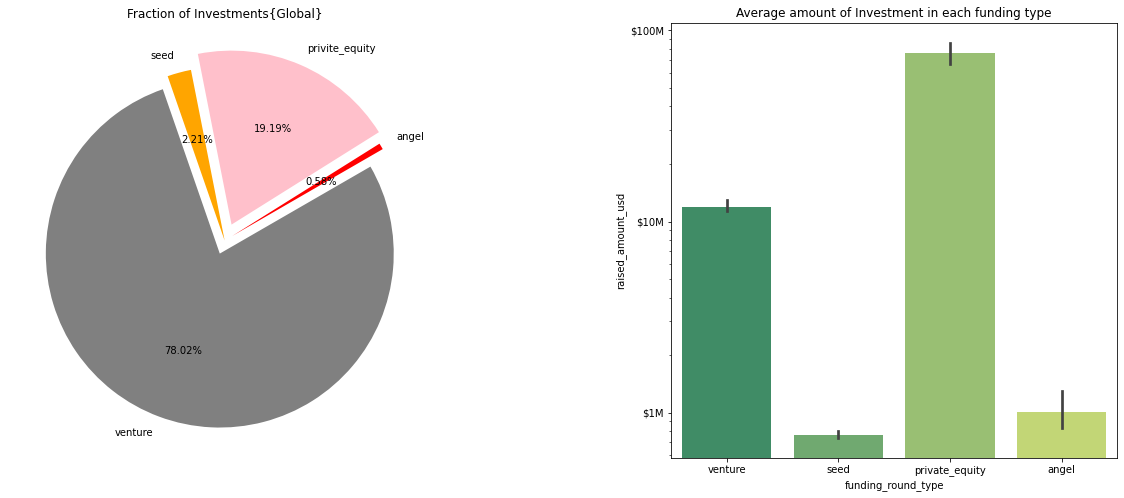

In [ ]:
#Calculating the most representative value of the investment amount for each of the four funding
print("Average Ivestments for the 4 funding_types that Sparks Funds are interested in:")
avg = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False).to_frame().reset_index()
avg['raised_amt_usd_in_millions'] = avg.raised_amount_usd/1e6
print(avg)
print("------------------------------------------------------------------------------------------------------------------------------------------------\n")


#defining a function for labelling and formatting the yticks
def millions(x, pos):
    if (x >= 1e6):
      val = x/1e6
      return('${:.0f}M'.format(val))
    elif (x >= 1e9):
      val = x/1e9
      return('${:.0f}B'.format(val))
      
x = list(master_frame.raised_amount_usd.values)
x_format = ticker.FuncFormatter(millions)

#setting the size for the graph to be plotting
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)


ax = plt.pie(frac.raised_amount_usd/master_frame.raised_amount_usd.sum(), autopct='%.2f%%',explode=(0.05,0.1,0,0.08),
        labels=('angel','privite_equity','seed','venture'),startangle=30,colors=['red','pink','orange','grey'])
plt.title('Fraction of Investments{Global}')

ax1 = fig.add_subplot(122)
ax1 = sns.barplot(x=master_frame.funding_round_type,y=master_frame.raised_amount_usd,estimator=np.mean,palette='summer')
plt.yscale("log")
ax1.yaxis.set_major_formatter(x_format)
ax1.yaxis.set_minor_formatter(ticker.NullFormatter())
ax1.title.set_text('Average amount of Investment in each funding type')
plt.subplots_adjust(wspace=0.5)


plt.show()

Based on output obtained for various investment types, the average investments for the funding_type, "venture" is 11.89 million USD Dollars
Considering that Spark Funds wants to invest between 5 to 15 million USD, the funding_type "venture" should be suitable.

Also, Checkpoint 6 Plots1 is as shown in the above graph.
The plot shows the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. 
This chart makes it clear that “venture” funding type (FT) is best suited for Spark Funds.

##**Checkpoint 3: Country Analysis**
---
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring



In [ ]:
#filtering only venture funding type from the master_frame dataframe
master_venture = master_frame.loc[master_frame['funding_round_type']=='venture']
master_venture = master_venture.reset_index(drop=True)
print(master_venture.shape)
master_venture.head()

(44725, 10)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000,fame,Media,operating,IND
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0000,0-6.com,Curated Web,operating,CHN
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,A,21-12-2009,719491.0000,Ondine Biomedical Inc.,Biotechnology,operating,CAN
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0000,H2O.ai,Analytics,operating,USA
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,A,03-01-2013,1700000.0000,H2O.ai,Analytics,operating,USA




Calculating the Top9 countries that have received the highest investments:

In [ ]:
top9_df = master_venture.groupby('country_code')['raised_amount_usd'].sum().to_frame(name='total_investments').reset_index()
top9 = top9_df.nlargest(9,'total_investments')
top9 = top9.reset_index(drop=True)
top9

,country_code,total_investments
0,USA,398324586390.0000
1,CHN,38642273502.0000
2,GBR,18142285645.0000
3,IND,13920253718.0000
4,CAN,8747167598.0000
5,FRA,6742608637.0000
6,ISR,6484356814.0000
7,DEU,6021103078.0000
8,JPN,3156202471.0000


choosing the top3 countries with english as their official language from info available at (https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language)

In [ ]:
#top3 English-Speaking countries with the highest investments
top9[top9.country_code.isin(['USA','GBR','IND'])]

,country_code,total_investments
0,USA,398324586390.0000
2,GBR,18142285645.0000
3,IND,13920253718.0000


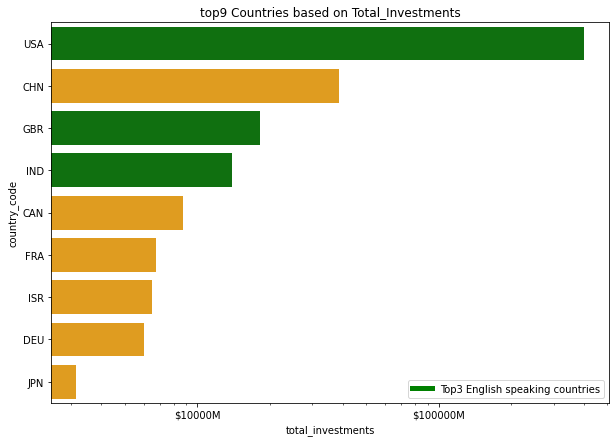

In [ ]:
#plotting the top9 countries

from matplotlib.lines import Line2D  #importing a library for naming the legend in the graph
x_format = ticker.FuncFormatter(millions) #function as called previously
x = list(top9.total_investments.values)

ax = plt.figure(figsize=(10,7))
countries = top9.country_code.values.tolist()
clrs = ['green' if i<=3 and i!=1 else 'orange' for i, j in enumerate(countries) ]
ax = sns.barplot(y=top9.country_code,x=top9.total_investments,palette=clrs)
plt.xscale("log")
#plt.xticks(np.arange(min(x),max(x)+1,1e6))
ax.xaxis.set_major_formatter(x_format)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
plt.title('top9 Countries based on Total_Investments')

legend_ele = [Line2D([0], [0], color='green', lw=5)]

ax.legend(legend_ele, ['Top3 English speaking countries'])
plt.show(ax)
plt.show()

Checkpoint 6 Plots2 is as shown in the above graph.

This plot shows the top 9 countries against the total amount of investments of funding type FT. 
This plot also makes the top 3 countries English-Speaking countries very clear.


##**Checkpoint 4: Sector Analysis 1**


---



Finding the Primary Sectors

In [ ]:
#Splitting the Primary Sector from the category_list present in the dataframe
split_category = master_venture.category_list.str.split('|').tolist()
split_category_pri_sec = [split_category[i][0] for i in range(int(len(split_category)))]

master_venture['primary_sector'] = split_category_pri_sec
                                                              
master_venture.head()                                                              

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000,fame,Media,operating,IND,Media
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0000,0-6.com,Curated Web,operating,CHN,Curated Web
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,A,21-12-2009,719491.0000,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0000,H2O.ai,Analytics,operating,USA,Analytics
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,A,03-01-2013,1700000.0000,H2O.ai,Analytics,operating,USA,Analytics


In [ ]:
#verifying if the split is successful:
master_venture[master_venture.category_list.str.contains('\|')][['company_permalink','category_list','primary_sector']].head(10)

,company_permalink,category_list,primary_sector
6,/organization/1-mainstream,Apps|Cable|Distribution|Software,Apps
13,/organization/1001-menus,Local Businesses|Restaurants,Local Businesses
14,/organization/1001-menus,Local Businesses|Restaurants,Local Businesses
15,/organization/1001-menus,Local Businesses|Restaurants,Local Businesses
16,/organization/1001pharmacies-com,Cosmetics|Marketplaces,Cosmetics
17,/organization/1006-tv,Games|Media,Games
21,/organization/100health,Health Care|Health Care Information Technology...,Health Care
24,/organization/10x-genomics,Biotechnology|Technology,Biotechnology
27,/organization/123contactform,E-Commerce|SaaS,E-Commerce
28,/organization/128-technology,Service Providers|Technology,Service Providers


In [ ]:
#Importing the mapping data set

mapping = pd.read_csv(path+'mapping.csv',encoding='latin1')
mapping.shape

(688, 10)

In [ ]:
#checking for null values
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [ ]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Cleaning the mapping data:

In [ ]:
#dropping the null value
mapping.dropna(subset=['category_list'],inplace=True)
print(mapping.shape)
mapping.isnull().sum()

(687, 10)


category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [ ]:
#data present in the category list contains '0' in place of the letters 'na'
mapping[mapping.category_list.str.contains('0')][['category_list']].head()

,category_list
20,Alter0tive Medicine
22,A0lytics
59,Big Data A0lytics
79,Business A0lytics
89,Can0bis


In [ ]:
#replacing 0 with 'na
mapping_category = mapping.category_list.str.replace('0','na',regex=True).to_list()

mapping['category_list'] = mapping_category

#verifying the changes are successful
mapping[mapping.category_list.str.contains('na')][['category_list']].head()

,category_list
20,Alternative Medicine
22,Analytics
59,Big Data Analytics
79,Business Analytics
89,Cannabis


In [ ]:
#ensuring 0 is not elimated from the category_list where it is necessary
mapping.category_list.replace({"Enterprise 2.na":"Enterprise 2.0"},inplace=True)
mapping.loc[mapping.category_list=='Enterprise 2.0']

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,Enterprise 2.0,0,0,0,0,0,0,0,1,0


In [ ]:
#Assigning each of the sector to its category list
mapping_melt = pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports','Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health','Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],var_name='main_sector', value_name='main_sectors_value')

mapping_melt

,category_list,main_sector,main_sectors_value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [ ]:
#picking only those records that have the main_sectors_value as 1
mapping_sector = mapping_melt.loc[mapping_melt.main_sectors_value==1]
mapping_sector = mapping_sector.reset_index(drop=True)
print(mapping_sector.shape)
mapping_sector.head()

(687, 3)


,category_list,main_sector,main_sectors_value
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1


In [ ]:
#checking the distict count of the 8 main sectors
mapping_sector.main_sector.value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: main_sector, dtype: int64

In [ ]:
#Converting the column category list from the mapping dataframe to lowercase and stripping any whitespaces present
mapping_sector['category_list'] = mapping_sector.category_list.str.lower()
mapping_sector['category_list'] = mapping_sector.category_list.str.strip()

#Converting the column primary sector from the master_venture dataframe to lowercase and stripping any whitespaces present
master_venture['primary_sector'] = master_venture.primary_sector.str.lower()
master_venture['primary_sector'] = master_venture.primary_sector.str.strip()

In [ ]:
#renaming the column before the merge
mapping_sector = mapping_sector.rename(columns={'category_list':'primary_sector'})

#merging the obtained mapping_sector with the master dataframe that contains the venture related information
category_merge= master_venture.merge(mapping_sector,how='inner',on='primary_sector')
category_merge.drop(columns=['main_sectors_value'],inplace=True)
print(category_merge.shape)
category_merge.head()

(44716, 12)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000,fame,Media,operating,IND,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,A,06-10-2015,15000000.0000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,A,07-05-2013,5800000.0000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,A,26-03-2014,18000000.0000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0000,All Def Digital,Media,operating,USA,media,Entertainment


In [ ]:
#verifying the column names if 'primary_sector' and 'main_sector' are added
category_merge.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'category_list', 'status', 'country_code', 'primary_sector',
       'main_sector'],
      dtype='object')

##Checkpoint 5: Sector Analysis 2


---
Identifying top3 sectors to invest between 5 and 15 million USD

In [ ]:
#creating 3 df's with investment range between 5 and 15 million USD
D1= category_merge.loc[(category_merge.raised_amount_usd>=5000000)&(category_merge.raised_amount_usd<=15000000)&(category_merge.country_code=='USA')]
D2= category_merge.loc[(category_merge.raised_amount_usd>=5000000)&(category_merge.raised_amount_usd<=15000000)&(category_merge.country_code=='GBR')]
D3= category_merge.loc[(category_merge.raised_amount_usd>=5000000)&(category_merge.raised_amount_usd<=15000000)&(category_merge.country_code=='IND')]

Creating The total number (or count) of investments for each main sector in a separate column and The total amount invested in each main sector in a separate column for each of the df created above

In [ ]:
#creating a function to create 2 new columns of count and total_amount_invested
def add_col(df):
  df['count_of_investements_main_sector'] = df.groupby('main_sector')['raised_amount_usd'].transform('count')
  df['total_amount_invested_main_sector'] = df.groupby('main_sector')['raised_amount_usd'].transform('sum')
  return df

In [ ]:
D1 = add_col(D1)
print("Shape of the dataframe containing USA details:", D1.shape)
D1.head()

Shape of the dataframe containing USA details: (11286, 14)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector,count_of_investements_main_sector,total_amount_invested_main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0000,All Def Digital,Media,operating,USA,media,Entertainment,531,4602749912.0000
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0000,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment,531,4602749912.0000
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0000,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment,531,4602749912.0000
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0000,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment,531,4602749912.0000
30,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0000,MEDIABONG,Media|Semantic Search|Video,operating,USA,media,Entertainment,531,4602749912.0000


In [ ]:
D2 = add_col(D2)
print("Shape of the dataframe containing GBR details:",D2.shape)
D2.head()

Shape of the dataframe containing GBR details: (582, 14)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector,count_of_investements_main_sector,total_amount_invested_main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,A,06-10-2015,15000000.0000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,53,463514687.0000
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,A,07-05-2013,5800000.0000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,53,463514687.0000
118,/organization/azimo,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,A,11-03-2014,10000000.0000,Azimo,Curated Web|Finance Technology|Financial Servi...,operating,GBR,curated web,"News, Search and Messaging",66,558500705.0000
129,/organization/basekit-platform,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,A,13-05-2014,7000000.0000,BaseKit,Curated Web|Internet|Web Design,operating,GBR,curated web,"News, Search and Messaging",66,558500705.0000
130,/organization/basekit-platform,/funding-round/9ceb098a822fb971db490b23c1067336,venture,A,03-02-2014,6818631.0000,BaseKit,Curated Web|Internet|Web Design,operating,GBR,curated web,"News, Search and Messaging",66,558500705.0000


In [ ]:
D3 = add_col(D3)
print("Shape of the dataframe containing IND details:",D3.shape)
D3.head()

Shape of the dataframe containing IND details: (315, 14)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector,count_of_investements_main_sector,total_amount_invested_main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000,fame,Media,operating,IND,media,Entertainment,32,272080000.0000
120,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.0000,Babajob,Curated Web|Information Technology|Services|St...,operating,IND,curated web,"News, Search and Messaging",49,408834545.0000
142,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.0000,Bharat Matrimony,Curated Web|Match-Making,operating,IND,curated web,"News, Search and Messaging",49,408834545.0000
164,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.0000,Bluestone.com,Curated Web,operating,IND,curated web,"News, Search and Messaging",49,408834545.0000
166,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.0000,Bluestone.com,Curated Web,operating,IND,curated web,"News, Search and Messaging",49,408834545.0000


###Country wise Analysis

In [ ]:
#Total Number of Investments
print("Total Number of Investments in USA:", len(D1.index))
print("Total Number of Investments in GBR:", len(D2.index))
print("Total Number of Investments in IND:", len(D3.index))

Total Number of Investments in USA: 11286
Total Number of Investments in GBR: 582
Total Number of Investments in IND: 315


In [ ]:
#Total Investments
print("Total Amount of Investment(USD) in USA:", D1.raised_amount_usd.sum())
print("Total Amount of Investment(USD) in GBR:",D2.raised_amount_usd.sum())
print("Total Amount of Investment(USD) in IND:",D3.raised_amount_usd.sum())

Total Amount of Investment(USD) in USA: 101000666779.0
Total Amount of Investment(USD) in GBR: 5053293406.0
Total Amount of Investment(USD) in IND: 2820673602.0


In [ ]:
#Top3 main_sectors in USA
D1.main_sector.value_counts()[:3]

Others                                     2758
Social, Finance, Analytics, Advertising    2590
Cleantech / Semiconductors                 2192
Name: main_sector, dtype: int64

In [ ]:
#Top3 main_sectors in GBR
D2.main_sector.value_counts()[:3]

Others                                     140
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 116
Name: main_sector, dtype: int64

In [ ]:
#Top3 main_sectors in IND
D3.main_sector.value_counts()[:3]

Others                                     103
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  49
Name: main_sector, dtype: int64

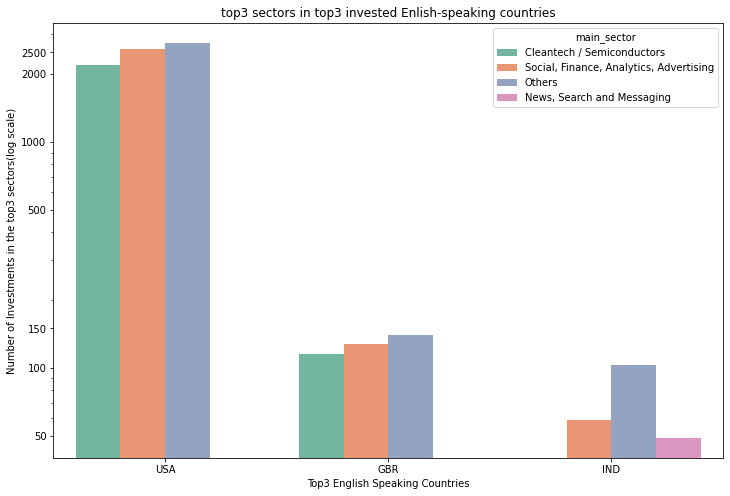

In [ ]:
#Plot for top3 countries with top3 sectors
#orgaizing the information required to plot the graph
us_3 = D1.main_sector.value_counts().keys().tolist()[:3]
country1 = D1.loc[D1.main_sector.isin(us_3)]

uk_3 = D2.main_sector.value_counts().keys().tolist()[:3]
country2 = D2.loc[D2.main_sector.isin(uk_3)]

ind_3 = D3.main_sector.value_counts().keys().tolist()[:3]
country3 = D3.loc[D3.main_sector.isin(ind_3)]

sector_top3 = pd.concat([country1,country2,country3])


ax = plt.figure(figsize=(12,8))
ax = sns.countplot(x='country_code', hue='main_sector', data=sector_top3, palette='Set2')
plt.yscale("log")
ax.set_xlabel("Top3 English Speaking Countries")
ax.set_ylabel("Number of Investments in the top3 sectors(log scale)")
ax.set_yticks([50,100,150,500,1000,2000,2500])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.title('top3 sectors in top3 invested Enlish-speaking countries')


plt.show()

Checkpoint 6 Plots3 is as shown in the above graph.

This plot shows the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type 'venture'). 



Companies that received the highest investment for the top2 sectors

In [ ]:
#defining a function to find the comapnies 
def comp_name(df,sector):
  t1 = df.loc[df.main_sector==sector]
  t1 = t1.groupby(['company_permalink','name','country_code','main_sector'],sort=False)['raised_amount_usd'].sum().to_frame().reset_index()
  return(t1.loc[t1.raised_amount_usd==t1.raised_amount_usd.max()])

In [ ]:
#making use of the list created for plotting to get the top sector name
c11 = comp_name(D1, us_3[0])
c12 = comp_name(D2, uk_3[0])
c13 = comp_name(D3, ind_3[0])
company_top_sector = pd.concat([c11,c12,c13])
company_top_sector = company_top_sector.reset_index(drop=True)
company_top_sector

,company_permalink,name,country_code,main_sector,raised_amount_usd
0,/organization/virtustream,Virtustream,USA,Others,64300000.0000
1,/organization/electric-cloud,Electric Cloud,GBR,Others,37000000.0000
2,/organization/firstcry-com,FirstCry.com,IND,Others,39000000.0000


In [ ]:
#making use of the list created for plotting to get the top second sector name
c21 = comp_name(D1, us_3[1])
c22 = comp_name(D2, uk_3[1])
c23 = comp_name(D3, ind_3[1])
company_top2_sector = pd.concat([c21,c22,c23])
company_top2_sector = company_top2_sector.reset_index(drop=True)
company_top2_sector

,company_permalink,name,country_code,main_sector,raised_amount_usd
0,/organization/shotspotter,SST Inc. Formerly ShotSpotter,USA,"Social, Finance, Analytics, Advertising",67933006.0000
1,/organization/celltick-technologies,Celltick Technologies,GBR,"Social, Finance, Analytics, Advertising",37500000.0000
2,/organization/manthan-systems,Manthan Systems,IND,"Social, Finance, Analytics, Advertising",50700000.0000
